<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [646]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import pprint
import seaborn as sb
import matplotlib.pyplot as plt

# bring in plotly for interactive graphs
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [647]:
# load data, make sure numeric values are floats
sat = pd.read_csv('./sat_scores.csv',dtype={"Math":float, "Verbal":float,"Rate":float})
# print out the first bit to inspect
sat.head()

State  Rate  Verbal   Math
0    CT  82.0   509.0  510.0
1    NJ  81.0   499.0  513.0
2    MA  79.0   511.0  515.0
3    NY  77.0   495.0  505.0
4    NH  72.0   520.0  516.0

In [648]:
# convert to dictionary, where values are lists, holding the column values
sat_dict = sat.to_dict(orient='list')
sat_dict

{'State': ['CT',
  'NJ',
  'MA',
  'NY',
  'NH',
  'RI',
  'PA',
  'VT',
  'ME',
  'VA',
  'DE',
  'MD',
  'NC',
  'GA',
  'IN',
  'SC',
  'DC',
  'OR',
  'FL',
  'WA',
  'TX',
  'HI',
  'AK',
  'CA',
  'AZ',
  'NV',
  'CO',
  'OH',
  'MT',
  'WV',
  'ID',
  'TN',
  'NM',
  'IL',
  'KY',
  'WY',
  'MI',
  'MN',
  'KS',
  'AL',
  'NE',
  'OK',
  'MO',
  'LA',
  'WI',
  'AR',
  'UT',
  'IA',
  'SD',
  'ND',
  'MS',
  'All'],
 'Rate': [82.0,
  81.0,
  79.0,
  77.0,
  72.0,
  71.0,
  71.0,
  69.0,
  69.0,
  68.0,
  67.0,
  65.0,
  65.0,
  63.0,
  60.0,
  57.0,
  56.0,
  55.0,
  54.0,
  53.0,
  53.0,
  52.0,
  51.0,
  51.0,
  34.0,
  33.0,
  31.0,
  26.0,
  23.0,
  18.0,
  17.0,
  13.0,
  13.0,
  12.0,
  12.0,
  11.0,
  11.0,
  9.0,
  9.0,
  9.0,
  8.0,
  8.0,
  8.0,
  7.0,
  6.0,
  6.0,
  5.0,
  5.0,
  4.0,
  4.0,
  4.0,
  45.0],
 'Verbal': [509.0,
  499.0,
  511.0,
  495.0,
  520.0,
  501.0,
  500.0,
  511.0,
  506.0,
  510.0,
  501.0,
  508.0,
  493.0,
  491.0,
  499.0,
  486.0,
  482.0,

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [649]:
sat_from_dict = pd.DataFrame(sat_dict)
sat_from_dict.dtypes

State      object
Rate      float64
Verbal    float64
Math      float64
dtype: object

In [650]:
# what pandas thinks the types are
sat.dtypes

State      object
Rate      float64
Verbal    float64
Math      float64
dtype: object

In [651]:
# go into each array, grab a value and check its type

for key in sat_dict.keys():
    # get first value in list to check its type
    val = sat_dict[key][0]
    
    # get the type of val and convert into a str
    type_val = str(type(val))
    
    # grab part inbetween '' that designates the type  
    val_type = type_val.split("'")[1]
    print("The type of " + key + " is a "+ val_type )

The type of State is a str
The type of Rate is a float
The type of Verbal is a float
The type of Math is a float


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [652]:
sat.head(10)

State  Rate  Verbal   Math
0    CT  82.0   509.0  510.0
1    NJ  81.0   499.0  513.0
2    MA  79.0   511.0  515.0
3    NY  77.0   495.0  505.0
4    NH  72.0   520.0  516.0
5    RI  71.0   501.0  499.0
6    PA  71.0   500.0  499.0
7    VT  69.0   511.0  506.0
8    ME  69.0   506.0  500.0
9    VA  68.0   510.0  501.0

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [653]:
#rate signifies percentage of students in the state who took the test. 
# store col names as keys in dict with the values being another dict with "type" and "description" as keys
sat_meta_data ={
                'shape':{
                            'rows':sat.shape[0],
                             'columns':sat.shape[1]
                        },
                'State':{
                            'type':'object',
                            'description': 'The sate where the tests took place'
                        },
                'Verbal': {
                            'type':'float',
                            'description': 'The average score the students received on the verbal section'
                        },
                'Math':{
                            'type':'float', 
                            'description': 'The average scores the students received on the math section'
                        },
                'Rate':{
                            'type':'float',
                            'description': 'The percentage of tests taken in this state'
                        }
                }

In [654]:
sat_meta_data


{'shape': {'rows': 52, 'columns': 4},
 'State': {'type': 'object',
  'description': 'The sate where the tests took place'},
 'Verbal': {'type': 'float',
  'description': 'The average score the students received on the verbal section'},
 'Math': {'type': 'float',
  'description': 'The average scores the students received on the math section'},
 'Rate': {'type': 'float',
  'description': 'The percentage of tests taken in this state'}}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

Text(0.5, 1.0, 'Average Verbal Sat Score Distribution')

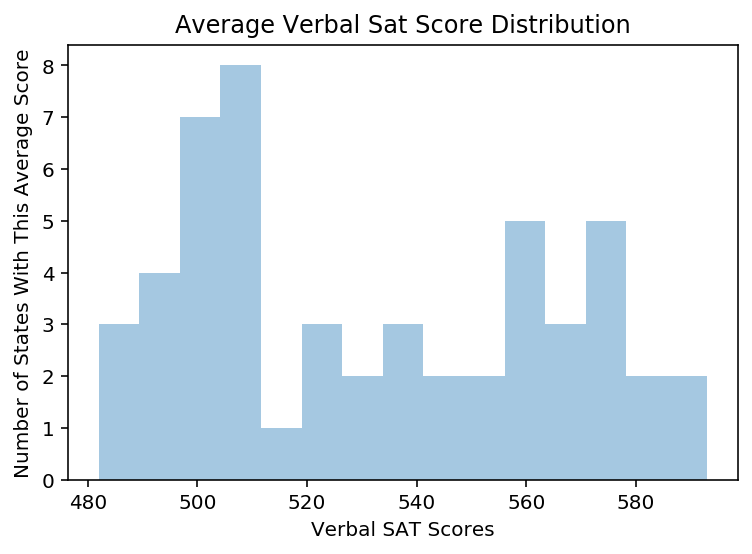

In [655]:

sb.distplot(sat['Verbal'],kde=False,bins=15)
plt.xlabel("Verbal SAT Scores")
plt.ylabel("Number of States With This Average Score")
plt.title("Average Verbal Sat Score Distribution")


Text(0.5, 1.0, 'Average Math SAT Score  Distribution')

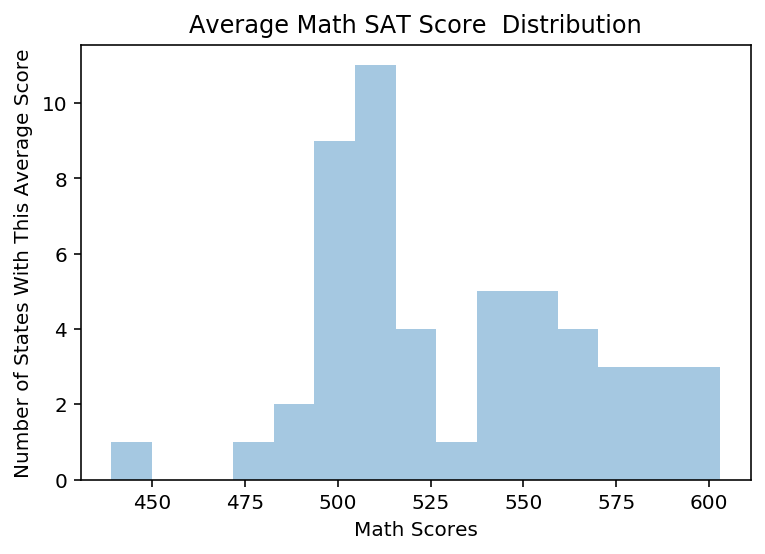

In [656]:

sb.distplot(sat['Math'],kde=False,bins=15)
plt.xlabel("Math Scores")
plt.ylabel("Number of States With This Average Score")
plt.title("Average Math SAT Score  Distribution")



Text(0.5, 1.0, 'Rate of Tests Taken Per State')

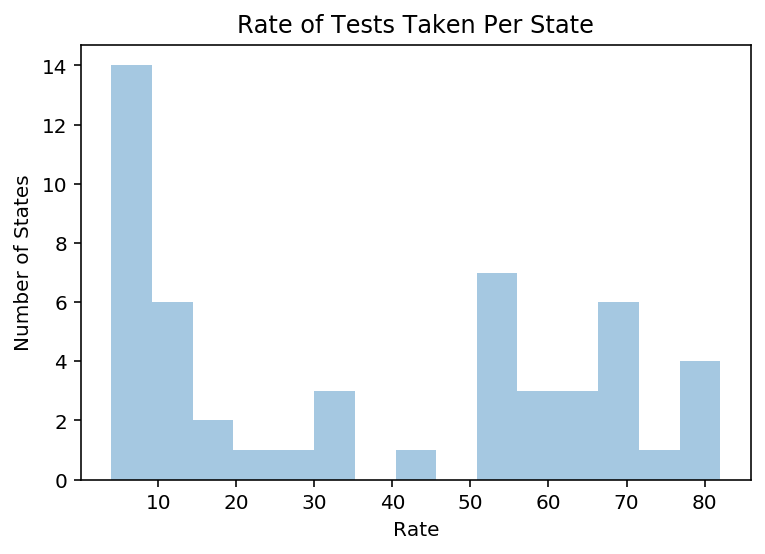

In [657]:

sb.distplot(sat['Rate'],kde=False,bins=15)
plt.xlabel("Rate")
plt.ylabel("Number of States")
plt.title("Rate of Tests Taken Per State")


### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

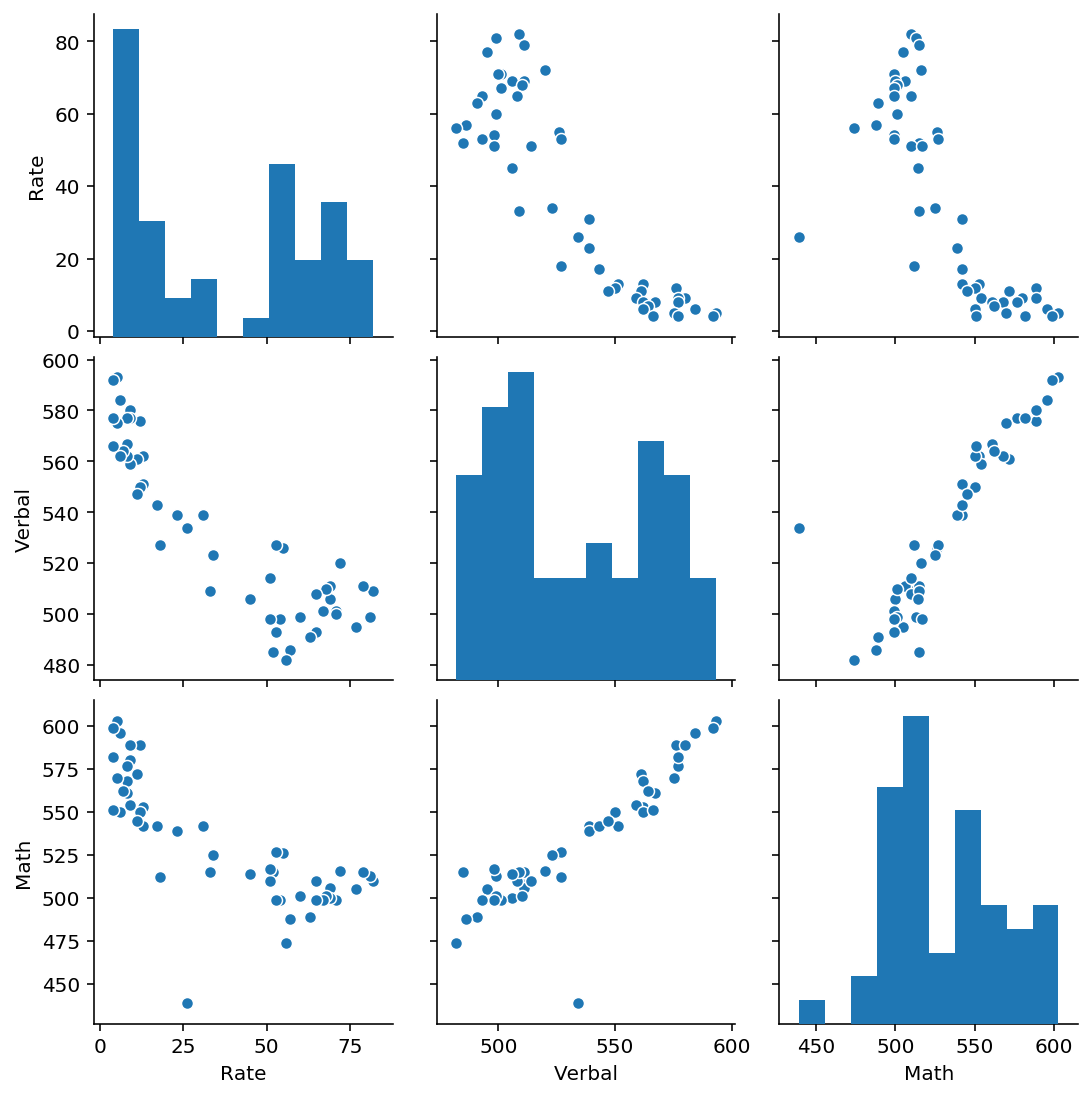

In [658]:
sb.pairplot(sat)

# the scatter plots shows me that as the rate of test taking increases the average scores decrease
# people who get high scores on the math section tend to also get high in verbal
# the converse is also true for low scorers


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

Text(0.5, 1.0, 'Average SAT scores Distribution')

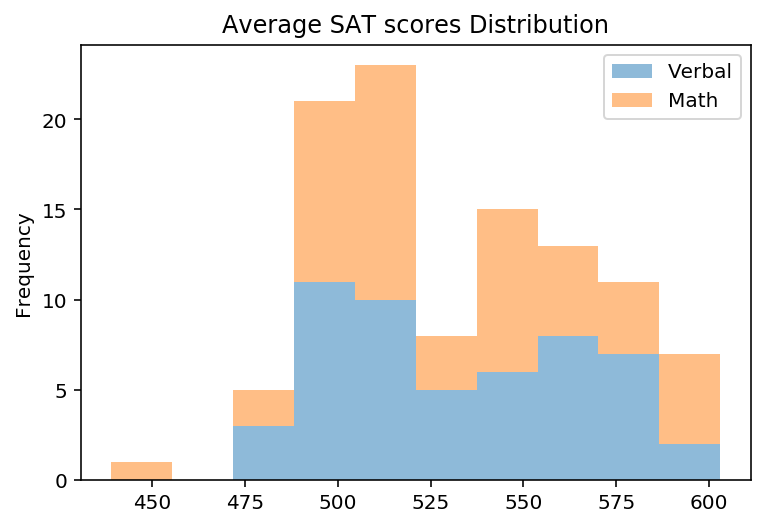

In [659]:
# create a stacked histogram showing both verbal and math scores
ax = sat[['Verbal','Math']].plot.hist(stacked=True,alpha = .5)
ax.set_title("Average SAT scores Distribution")

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

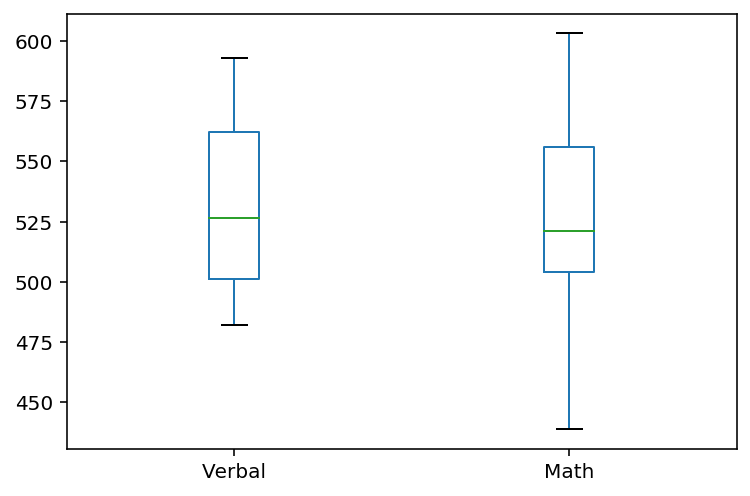

In [660]:
sat[['Verbal','Math']].plot.box()

# the box plot clearly communicates mean and interquartile range
# rate exists within a much smaller range than verbal and math and would be squashed and numerically unclear here.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [661]:
# remove the State column
sat_subset = sat[['Rate','Verbal','Math']]

# normalize it by subtracting the mean and dividing the std
sat_std = (sat_subset - sat_subset.mean())/ sat_subset.std()

Text(0, 0.5, 'Standardized Values ')

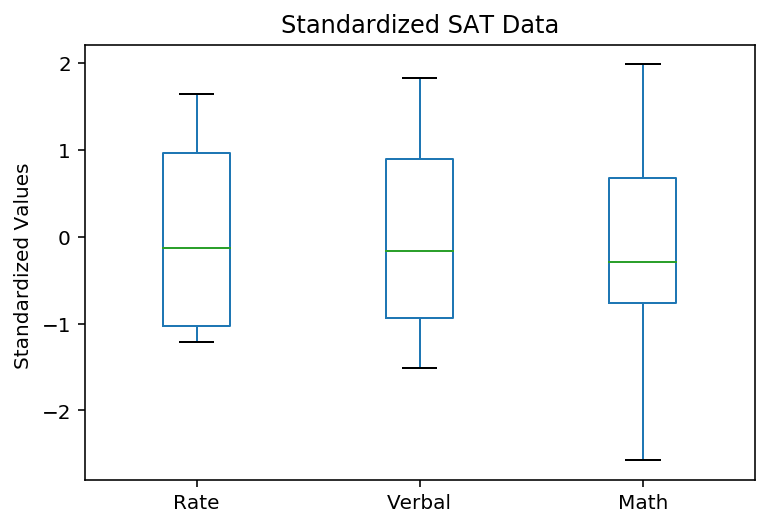

In [662]:
ax = sat_std.plot.box()
ax.set_title("Standardized SAT Data")
ax.set_ylabel("Standardized Values ")

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [663]:
# get the average verbal score
Verbal_mean = sat.Verbal.mean()

# create a mask to subset the dataframe on the condition that the verbal score is above the average verbal score
mask_mean = sat.Verbal > Verbal_mean

# only look at rows where conditions are true, just need verbal scores and state
high_verbal_mean = sat.loc[mask_mean,["Verbal","State"]]

# get the states that satisfy this condition
high_score_states_mean = high_verbal_mean["State"].values

# the number of states that satisfy condition
print(high_verbal_mean.shape[0])

24


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [664]:
# get the average verbal score
Verbal_median = sat.Verbal.median()

# create a mask to subset the dataframe on the condition that the verbal score is above the average verbal score
mask_median = sat.Verbal > Verbal_median

# only look at rows where conditions are true, just need verbal scores and state
high_verbal_median = sat.loc[mask_median,["Verbal","State"]]

high_score_states_median = high_verbal_median["State"].values

print(high_score_states_median.shape[0])

26


In [665]:
# look at all states that are above the median verbal scores but not above the mean verbal scores
# These states will have scores inbetween Verbal_median and Verbal_mean

in_median_not_mean = [state for state in high_score_states_median if state not in high_score_states_mean]
in_median_not_mean

['WA', 'WV']

In [666]:
# see if there are at states that are above the mean verbal score, but not above the median verbal scores

in_mean_not_median = [state for state in high_score_states_mean if state not in high_score_states_median]
in_mean_not_median

[]

In [667]:
# find the intersection of scores that are both above mean verbal and median verbal scores
# this shows me that the high verbal scoring state medians are near the state means

higher_than_median_and_mean = [state for state in high_score_states_mean if state in high_score_states_median]
higher_than_median_and_mean

['CO',
 'OH',
 'MT',
 'ID',
 'TN',
 'NM',
 'IL',
 'KY',
 'WY',
 'MI',
 'MN',
 'KS',
 'AL',
 'NE',
 'OK',
 'MO',
 'LA',
 'WI',
 'AR',
 'UT',
 'IA',
 'SD',
 'ND',
 'MS']

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [668]:
# create a new column showing the difference between verbal and math scores
sat['Verbal_min_Math'] = sat['Verbal'] - sat['Math']

# display dataframe inclusive of new column
sat.head()


State  Rate  Verbal   Math  Verbal_min_Math
0    CT  82.0   509.0  510.0             -1.0
1    NJ  81.0   499.0  513.0            -14.0
2    MA  79.0   511.0  515.0             -4.0
3    NY  77.0   495.0  505.0            -10.0
4    NH  72.0   520.0  516.0              4.0

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [669]:
# create new dataframe of the top 10 states with the greatest gap between verbal and math scores
verb_over_math = sat.sort_values('Verbal_min_Math', ascending=False).head(10).reset_index()

# display top 3 values in this new dataframe
verb_over_math.head(3) 


index State  Rate  Verbal   Math  Verbal_min_Math
0     27    OH  26.0   534.0  439.0             95.0
1     50    MS   4.0   566.0  551.0             15.0
2     29    WV  18.0   527.0  512.0             15.0

In [670]:
# create second new dataframe showing inverse, such that math is greater than verbal  
math_over_verb = sat.sort_values('Verbal_min_Math', ascending=True).head(10)

# display top 3 values in this new dataframe
math_over_verb.head(3) 


State  Rate  Verbal   Math  Verbal_min_Math
21    HI  52.0   485.0  515.0            -30.0
23    CA  51.0   498.0  517.0            -19.0
1     NJ  81.0   499.0  513.0            -14.0

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [671]:
# State will automatically be excluded because it's an object
# verbal and math scores are correlated, when verbal score increases so does math score
# Verbal_min_Math scores are weakly correlated with the other variables
# the matrix has 1 values accross the diagnal where there is a 1 to 1 correlation
# all corelation coeffiecients fall between -1 and 1, the closer they are to one or negative 1 the stronger the correlation
# the closer they are to 0 the weaker the correlation

sat.corr()

Rate    Verbal      Math  Verbal_min_Math
Rate             1.000000 -0.886432 -0.773746        -0.101412
Verbal          -0.886432  1.000000  0.899871         0.052600
Math            -0.773746  0.899871  1.000000        -0.388219
Verbal_min_Math -0.101412  0.052600 -0.388219         1.000000

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [672]:
sat.describe()

#count represents num of items in each column
#mean is the average value for each column
#std is the standard deviation from the mean for each column
#min is the minimum value in each column
#25% is the 25th percentile of the values of each column
#50% is the 50th percentile of the values of each column
#75% is the 75th percentile of the values of each column
#max is the maximum value in each column


Rate      Verbal        Math  Verbal_min_Math
count  52.000000   52.000000   52.000000        52.000000
mean   37.153846  532.019231  531.500000         0.519231
std    27.301788   33.236225   36.014975        15.729939
min     4.000000  482.000000  439.000000       -30.000000
25%     9.000000  501.000000  504.000000        -6.000000
50%    33.500000  526.500000  521.000000         0.000000
75%    63.500000  562.000000  555.750000         4.250000
max    82.000000  593.000000  603.000000        95.000000

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [673]:
# difference correlation is standarized, thus not scale dependent
# covariance is not standarized, as such it is scale dependent 
# to convert covariance to correlation take the values, covert the values by substracting the mean, then diving by the std
# correlation is more likely to be accurate as it works without relying on consistent value scale
# my data values by 

sat.cov()

Rate       Verbal         Math  Verbal_min_Math
Rate             745.387632  -804.355958  -760.803922       -43.552036
Verbal          -804.355958  1104.646682  1077.147059        27.499623
Math            -760.803922  1077.147059  1297.078431      -219.931373
Verbal_min_Math  -43.552036    27.499623  -219.931373       247.430995

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [674]:

Drug = pd.read_csv('./drug-use-by-age.csv')
Drug.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency  ...  oxycontin-use oxycontin-frequency  tranquilizer-use  \
0               -  ...            0.1                24.5               0.2   
1             3.0  ...            0.1                41.0               0.3   
2               -  ...            0.4                 4.5               0.9   
3             9.5  ...            0.8                 3.0               2.0   
4             1.0  ...            1.1                 4.0               2.4   

   tranquilizer-frequency  stimulant-use stimulant-frequency  meth-use  \
0                    52.0            0.2                 2.0       0.0   
1                    25.5            0.3                 4.0       0.1   
2                     5.0            0.8                12.0       0.1   
3                     4.5            1.5                 6.0       0.3   
4                    11.0            1.8                 9.5       0.3   

   meth-frequency  sedative-use sedative-frequency  
0               -           0.2               13.0  
1             5.0           0.1               19.0  
2            24.0           0.2               16.5  
3            10.5           0.4               30.0  
4            36.0           0.2                3.0  

[5 rows x 28 columns]

In [675]:
# looked at the shape to determin full number of coulumns to then access portion of total columns which are missing value columns
Drug.shape

(17, 28)

In [676]:
import warnings
warnings.filterwarnings('ignore')

# count how many missing values there are for each column
missing_values = Drug.apply(lambda x: x=='-').sum()

# Just get the columns with missing data along with how many they are missing
missing_cols = missing_values[missing_values>0]
missing_cols

cocaine-frequency      1
crack-frequency        3
heroin-frequency       1
inhalant-frequency     1
oxycontin-frequency    1
meth-frequency         2
dtype: int64

In [677]:
# seeing that there are a relatively small number of missing values, rather than cutting those rows,
# I will replace them with the mean value of the column

In [678]:
# find the column means for the cols with the missing data

# loop through every column that has missing values, so I can replace the missing cell values with the column mean
for col in missing_cols.index:
    
    # create mask of non missing values in this missing value column
    mask = Drug[col].apply(lambda x: x != '-')
    
    # just look at non missing values, 
    non_miss_vals = Drug[mask][col]
    
    # get the mean for the column
    mean_val = non_miss_vals.astype(float).mean()
    
    # replace missing values with column mean
    Drug.loc[Drug[col] == '-', col] = mean_val


In [679]:
# review the effects of this method
Drug.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency  ...  oxycontin-use oxycontin-frequency  tranquilizer-use  \
0         15.0357  ...            0.1                24.5               0.2   
1             3.0  ...            0.1                41.0               0.3   
2         15.0357  ...            0.4                 4.5               0.9   
3             9.5  ...            0.8                 3.0               2.0   
4             1.0  ...            1.1                 4.0               2.4   

   tranquilizer-frequency  stimulant-use stimulant-frequency  meth-use  \
0                    52.0            0.2                 2.0       0.0   
1                    25.5            0.3                 4.0       0.1   
2                     5.0            0.8                12.0       0.1   
3                     4.5            1.5                 6.0       0.3   
4                    11.0            1.8                 9.5       0.3   

   meth-frequency  sedative-use sedative-frequency  
0         35.9667           0.2               13.0  
1             5.0           0.1               19.0  
2            24.0           0.2               16.5  
3            10.5           0.4               30.0  
4            36.0           0.2                3.0  

[5 rows x 28 columns]

In [680]:

# looked at unique age values
print(Drug.age.unique())


['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22-23' '24-25' '26-29'
 '30-34' '35-49' '50-64' '65+']


In [681]:
# adjusted age ranges to be instead specific ages so that I would be able to visualize drug relationships with age

Drug.age = [12,  13, 14, 15, 16, 17, 18, 19, 20, 21, 22.5,24.5, 27.5,
 32, 42 ,57, 71] 

# viewed my age changes in all the impacted rows
Drug.head(17)

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0   12.0  2798          3.9                3.0            1.1   
1   13.0  2757          8.5                6.0            3.4   
2   14.0  2792         18.1                5.0            8.7   
3   15.0  2956         29.2                6.0           14.5   
4   16.0  3058         40.1               10.0           22.5   
5   17.0  3038         49.3               13.0           28.0   
6   18.0  2469         58.7               24.0           33.7   
7   19.0  2223         64.6               36.0           33.4   
8   20.0  2271         69.7               48.0           34.0   
9   21.0  2354         83.2               52.0           33.0   
10  22.5  4707         84.2               52.0           28.4   
11  24.5  4591         83.1               52.0           24.9   
12  27.5  2628         80.7               52.0           20.8   
13  32.0  2864         77.5               52.0           16.4   
14  42.0  7391         75.0               52.0           10.4   
15  57.0  3923         67.2               52.0            7.3   
16  71.0  2448         49.3               52.0            1.2   

    marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                   4.0          0.1               5.0        0.0   
1                  15.0          0.1               1.0        0.0   
2                  24.0          0.1               5.5        0.0   
3                  25.0          0.5               4.0        0.1   
4                  30.0          1.0               7.0        0.0   
5                  36.0          2.0               5.0        0.1   
6                  52.0          3.2               5.0        0.4   
7                  60.0          4.1               5.5        0.5   
8                  60.0          4.9               8.0        0.6   
9                  52.0          4.8               5.0        0.5   
10                 52.0          4.5               5.0        0.5   
11                 60.0          4.0               6.0        0.5   
12                 52.0          3.2               5.0        0.4   
13                 72.0          2.1               8.0        0.5   
14                 48.0          1.5              15.0        0.5   
15                 52.0          0.9              36.0        0.4   
16                 36.0          0.0             7.875        0.0   

   crack-frequency  ...  oxycontin-use oxycontin-frequency  tranquilizer-use  \
0          15.0357  ...            0.1                24.5               0.2   
1              3.0  ...            0.1                41.0               0.3   
2          15.0357  ...            0.4                 4.5               0.9   
3              9.5  ...            0.8                 3.0               2.0   
4              1.0  ...            1.1                 4.0               2.4   
5             21.0  ...            1.4                 6.0               3.5   
6             10.0  ...            1.7                 7.0               4.9   
7              2.0  ...            1.5                 7.5               4.2   
8              5.0  ...            1.7                12.0               5.4   
9             17.0  ...            1.3                13.5               3.9   
10             5.0  ...            1.7                17.5               4.4   
11             6.0  ...            1.3                20.0               4.3   
12             6.0  ...            1.2                13.5               4.2   
13            15.0  ...            0.9                46.0               3.6   
14            48.0  ...            0.3                12.0               1.9   
15            62.0  ...            0.4                 5.0               1.4   
16         15.0357  ...            0.0             14.8125               0.2   

    tranquilizer-frequency  stimulant-use stimulant-frequency  meth-use  \
0                     52.0            0.2                 2.0       0.0   


In [682]:
# Can now change all columns to floats, since there are no longer missing values or ranges, ie. 22-23
for c in Drug.columns:
    Drug[c] = Drug[c].astype(float)

Text(0.5, 1.0, 'Crack Frequency vs. Age ')

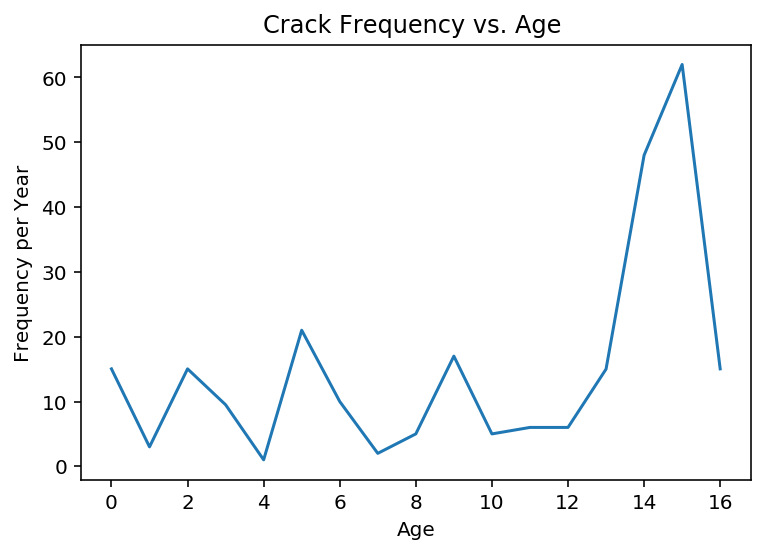

In [683]:
ax =Drug['crack-frequency'].plot()
ax.set_xlabel('Age')
ax.set_ylabel('Frequency per Year')
ax.set_title('Crack Frequency vs. Age ')

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

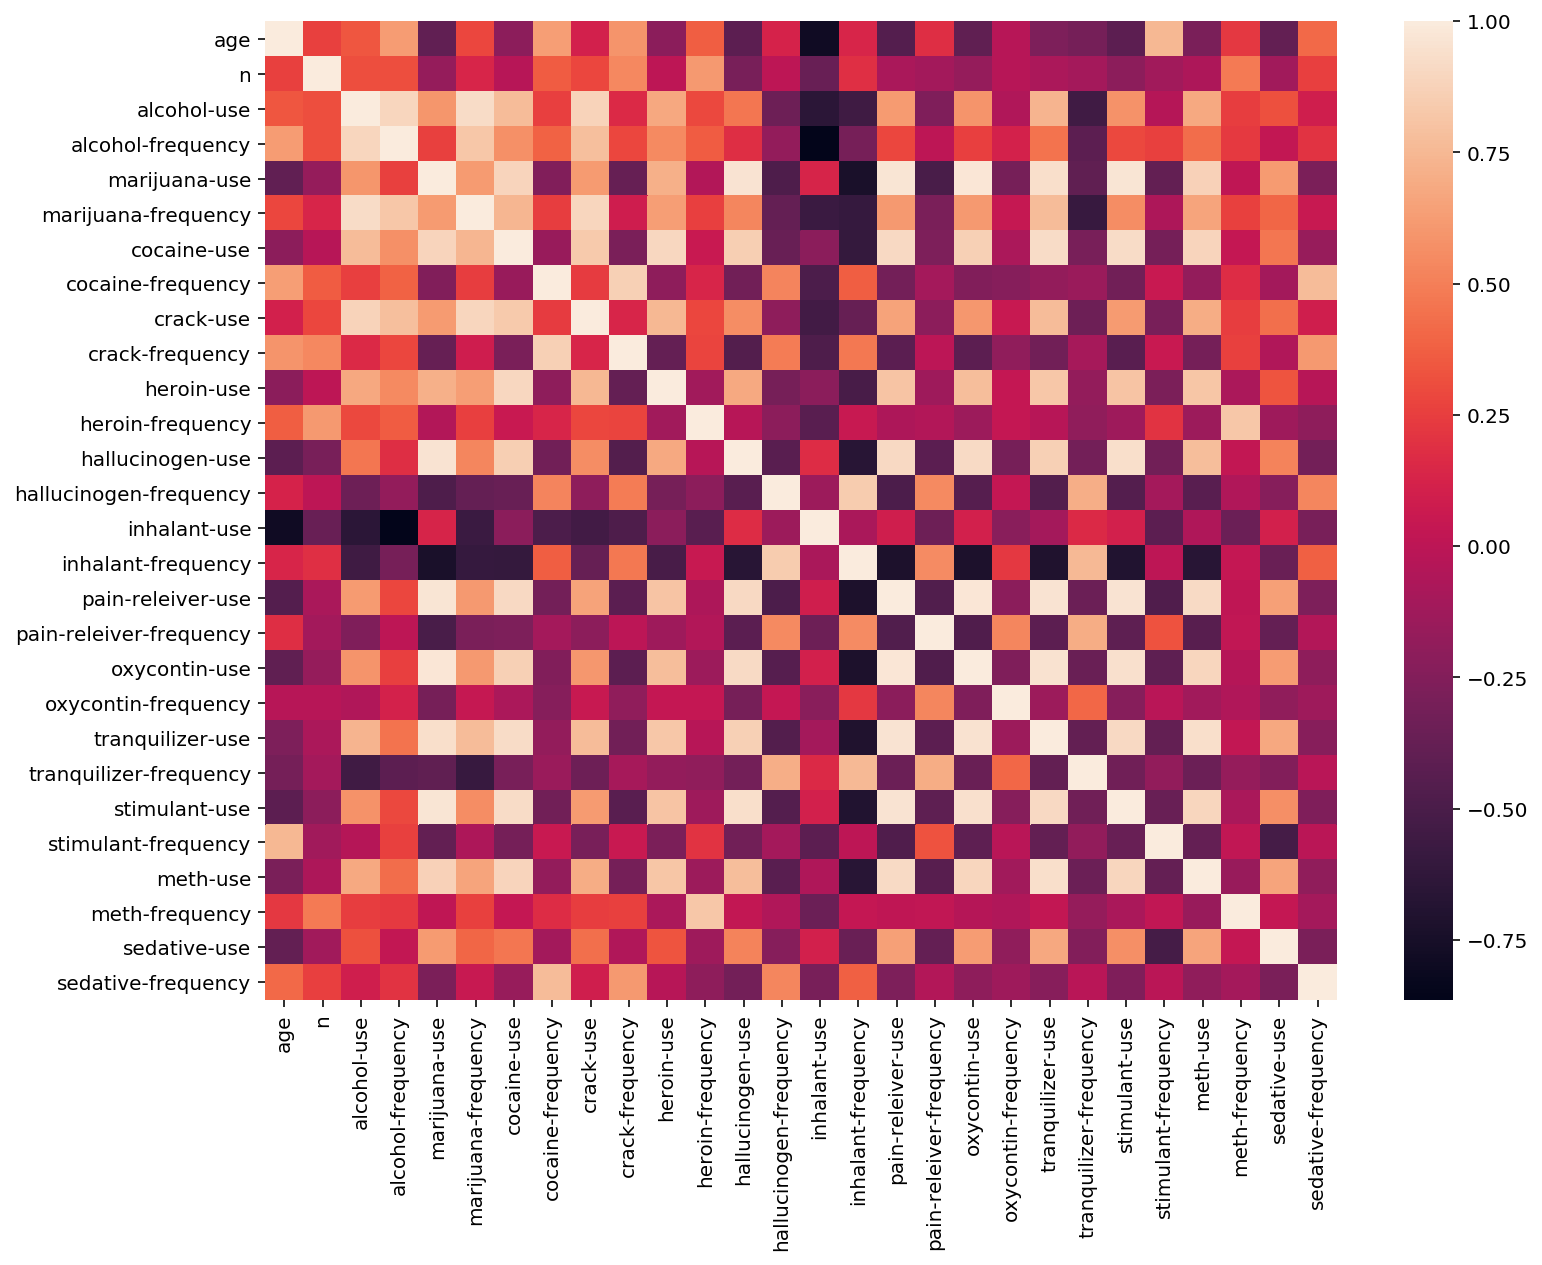

In [684]:
# to get an overveiw I looked at the correlation between usage and frequenies of types of drugs compared to each other
# I noticed where the correlations are strong and where they are weak
# one example is the stimulant use frequency is very weakly correlated with fequency and usage of other drugs
# while alchohol use has a strong correlation with most other drugs especially marijuana

plt.figure(figsize=(12,9))
# I enlarged the figure side for better legibility


sb.heatmap(Drug.corr())
# chose a heatmap correlation as a good way to visualize this data


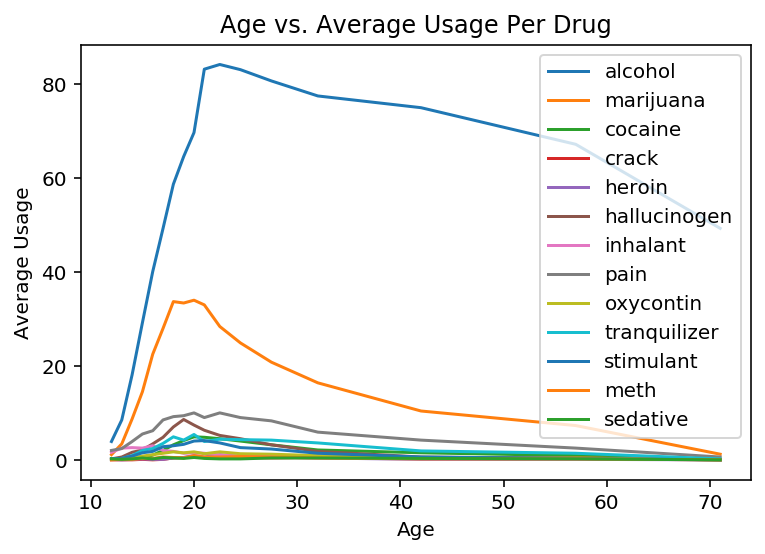

In [685]:
# selected only the colums with titles ending in use, such as marijuana_use, heroin_use etc
for c in Drug.columns:
    if c.endswith('use'):
        
        # plotted only use columns by age and labeled them without the '-use' portion of their column title
        plt.plot(Drug['age'].values,Drug[c].values,label = c.split('-')[0])

# labeled the x and y axis
plt.xlabel('Age')
plt.ylabel('Average Usage')

plt.title("Age vs. Average Usage Per Drug")

#plotted a legend
plt.legend()

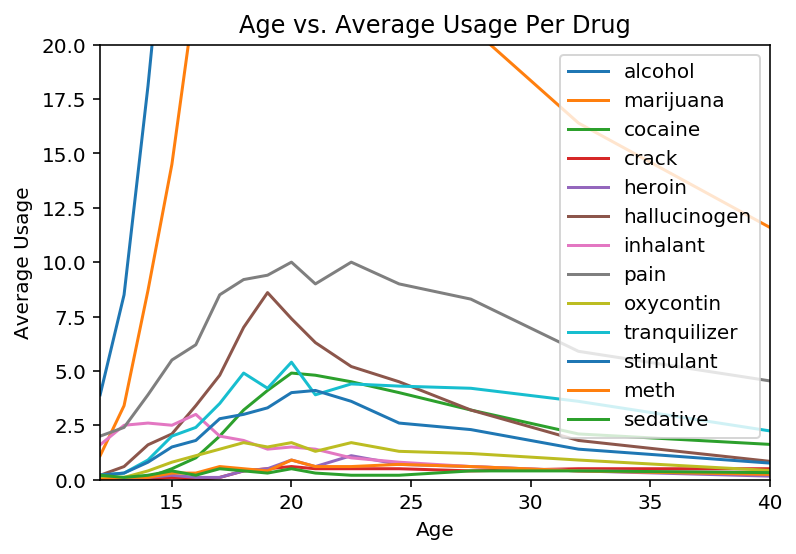

In [686]:
#same approach here, but I wanted to focus more on the drugs other that alcohol and marijuana, which are falling in a lower range
for c in Drug.columns:
    if c.endswith('use'):
        plt.plot(Drug['age'].values,Drug[c].values,label = c.split('-')[0])

plt.xlabel('Age')
plt.ylabel('Average Usage')

# zoomed in to get a better picture of everyithing thats not alcohol or marijuana
plt.ylim(0,20)

# just look at peak ages 12 to 40
plt.xlim(12,40)

plt.title("Age vs. Average Usage Per Drug")
plt.legend()

Text(0.5, 1.0, 'Age vs. Average Crack Usage')

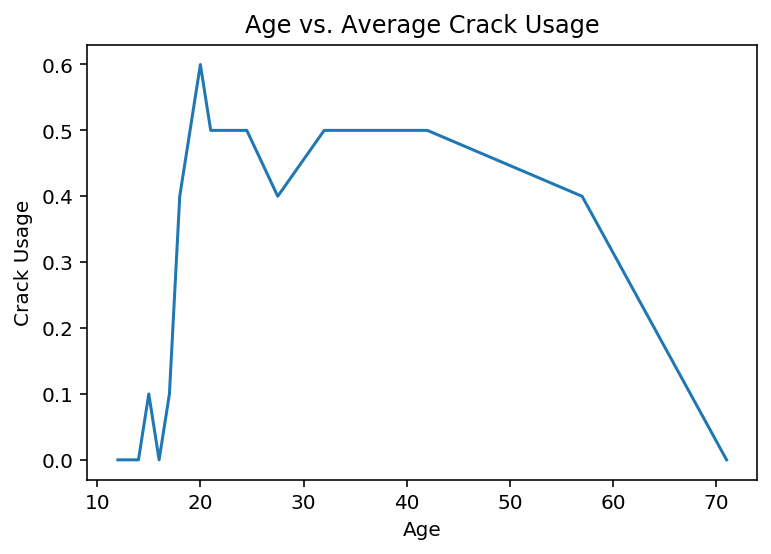

In [687]:
plt.plot(Drug['age'].values,Drug['crack-use'].values)

plt.xlabel('Age')
plt.ylabel('Crack Usage')



plt.title("Age vs. Average Crack Usage")

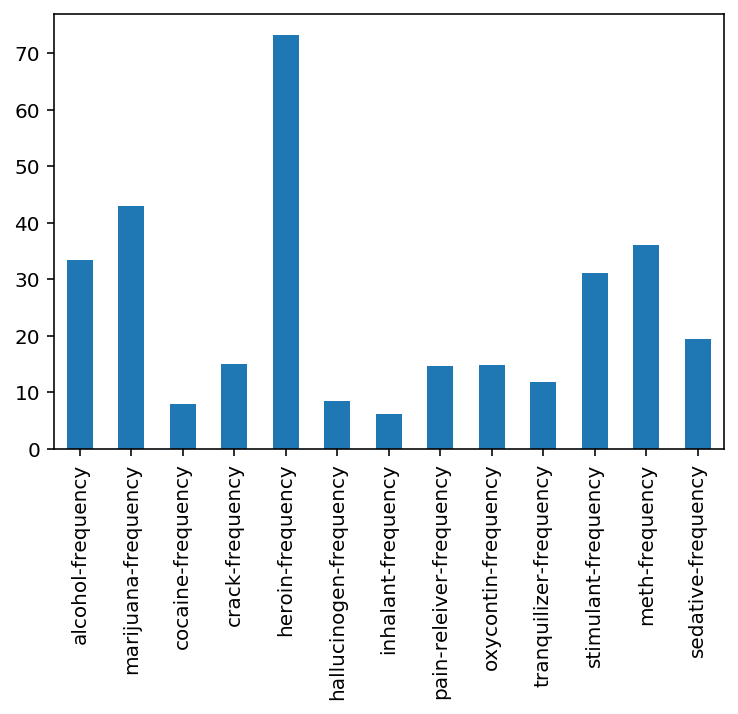

In [688]:
# looked at frequencies to consider most often used drugs
freq_cols = [c for c in Drug.columns if c.endswith('frequency')]

# find the mean frequencies and plot them as a bar plot 
# This is assuming each age group has the same number of people in it
Drug[freq_cols].mean().plot.bar()

Text(0.5, 1.0, '(Adjusted) Drug Use Frequency')

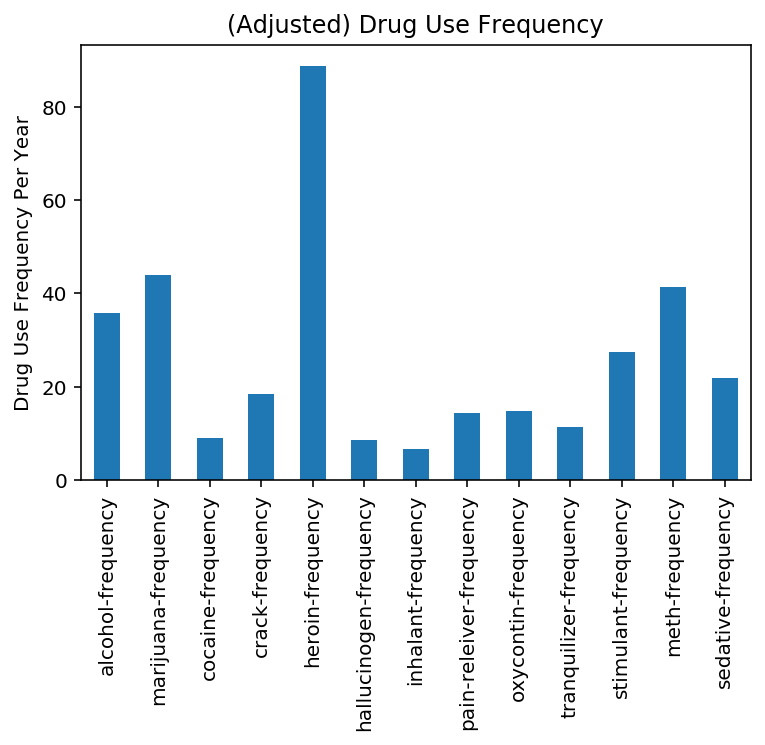

In [689]:
# 

# get the total usage per age per drug, this is taking into account different sample sizes of the different groups
num_times_per_year = Drug[freq_cols].mul(Drug['n'],axis=0)

# total times drugs have been used for all people over a year
tot_drug_use = num_times_per_year.sum()

# divide by all the participants in the study to get average usage per year
ave_drug_use = tot_drug_use/Drug['n'].sum()

ax = ave_drug_use.plot.bar()

ax.set_ylabel('Drug Use Frequency Per Year')
ax.set_title('(Adjusted) Drug Use Frequency')



### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

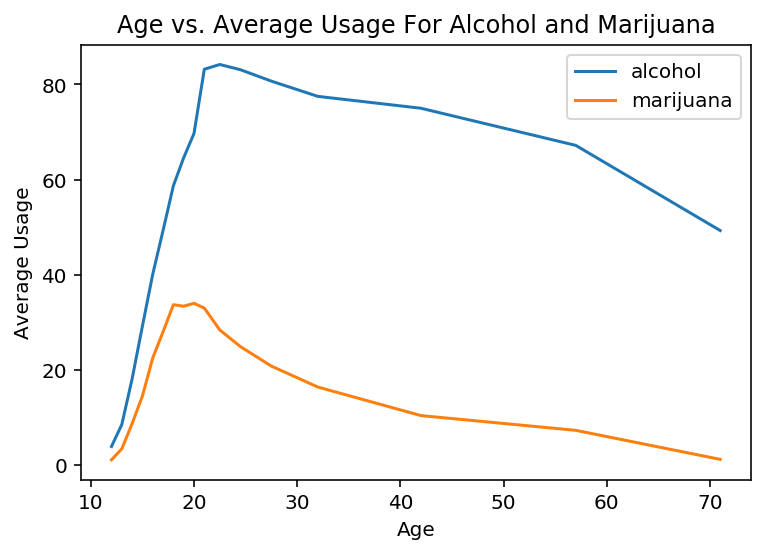

In [690]:
# I would like compare marijuana usage to alcohol usage
# HO, null hypothesis, is that there is no correlation in usage
# H1, alternative hypothesis, is that there is a correlation in usage
# my alpha is 5%
# I will chi squared test and statistical significance test
# I will visualize my results and describe them




# inspect the relationship between these two variables in relation to age
# selected only the alcohol and marijuana use
for c in ['alcohol-use','marijuana-use']:

    # plotted only use columns by age and labeled them without the '-use' portion of their column title
    plt.plot(Drug['age'].values,Drug[c].values,label = c.split('-')[0])

# labeled the x and y axis
plt.xlabel('Age')
plt.ylabel('Average Usage')

plt.title("Age vs. Average Usage For Alcohol and Marijuana")

#plotted a legend
plt.legend()



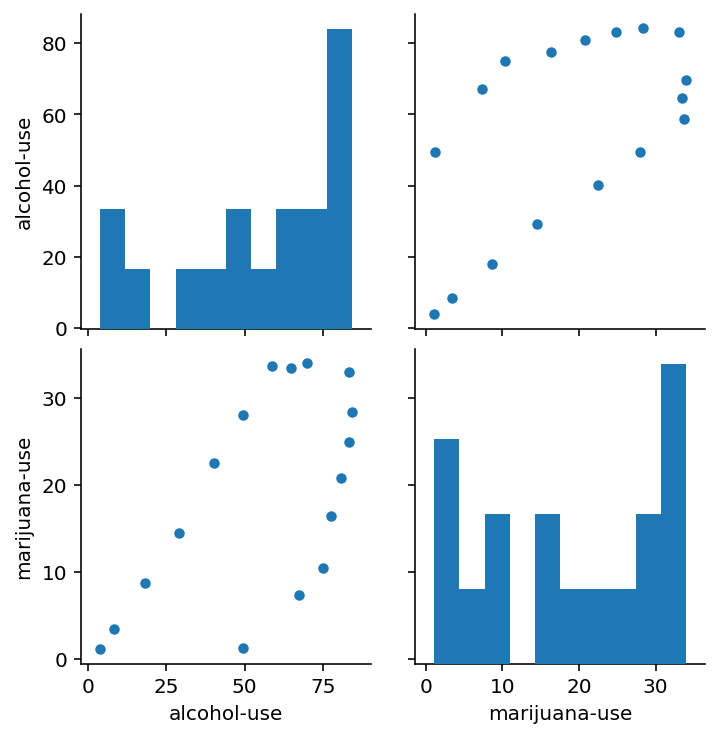

In [691]:
# explore their relationship
sb.pairplot(Drug[['alcohol-use','marijuana-use']])

In [692]:
#compared the means
Drug[['marijuana-use','alcohol-use']].describe()

marijuana-use  alcohol-use
count      17.000000    17.000000
mean       18.923529    55.429412
std        11.959752    26.878866
min         1.100000     3.900000
25%         8.700000    40.100000
50%        20.800000    64.600000
75%        28.400000    77.500000
max        34.000000    84.200000

In [693]:
# looked at the correlation between marijuana use and alhohol use
# used stats.pearsonr instead of .corr() so that I could see the p- value as well
# I did so to look at the statistical significance of the correlation
# this p- value shows me that there is less than a 1.1 percent probability that the null hypothesis is true
# the p value is less than my significance level, alpha = 5%
# so I can reject my null hypothesis

stats.pearsonr(Drug['marijuana-use'], Drug['alcohol-use'])


(0.5941650600365183, 0.0118996951491547)

In [694]:
# I created my contingency table for the chi squared test by multiplying the two chosen use columns by
# the number of people surveyed per row, which is contained in the n column

table = np.array([[Drug['marijuana-use'] * Drug['n'], Drug['alcohol-use'] * Drug['n']]])
table

array([[[  3077.8,   9373.8,  24290.4,  42862. ,  68805. ,  85064. ,
          83205.3,  74248.2,  77214. ,  77682. , 133678.8, 114315.9,
          54662.4,  46969.6,  76866.4,  28637.9,   2937.6],
        [ 10912.2,  23434.5,  50535.2,  86315.2, 122625.8, 149773.4,
         144930.3, 143605.8, 158288.7, 195852.8, 396329.4, 381512.1,
         212079.6, 221960. , 554325. , 263625.6, 120686.4]]])

In [695]:
# then I computed the chi squared formula for statistical significance 
# results indicate that there is zero probabilty of independence between the two items compared
results = stats.chi2_contingency(table)
chi2 = results[0]
pvalue = results[1]
print(chi2)
print(pvalue)

210853.20841136496
0.0


**Report**
In this exercise I tested the null hypothesis that alcohol and marijuana usage were independent and uncorrelated.  I used an alpha value of .05. 
The results of both the pearson correlation test and the chi-squared test returned p values less than the alpha which allows me to reject the null hypothesis.

Therfore I can adopt the alternative hypothesis, that alcohol and marijuana use are correlated and dependent.



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

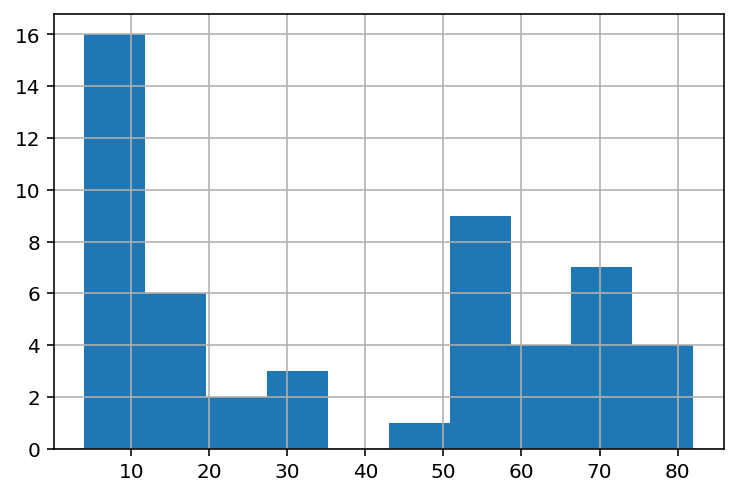

In [696]:
# inspect Rate Variable
sat['Rate'].hist()

# Doesn't look like there are any outliers

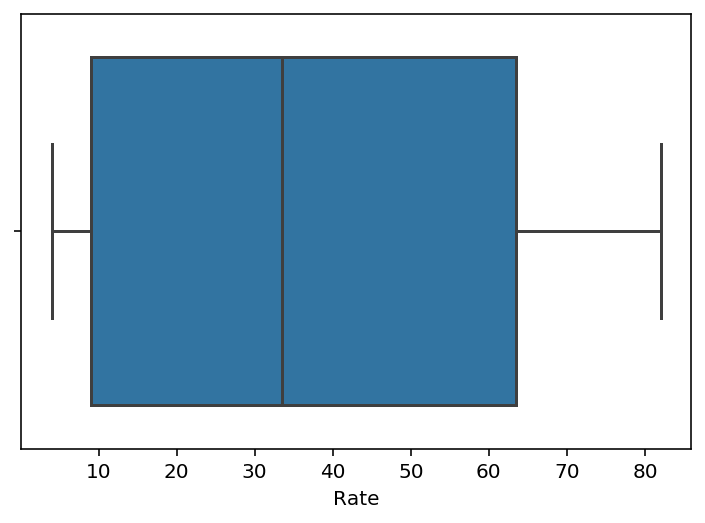

In [697]:
# still no outliers
sb.boxplot(x=sat['Rate'])

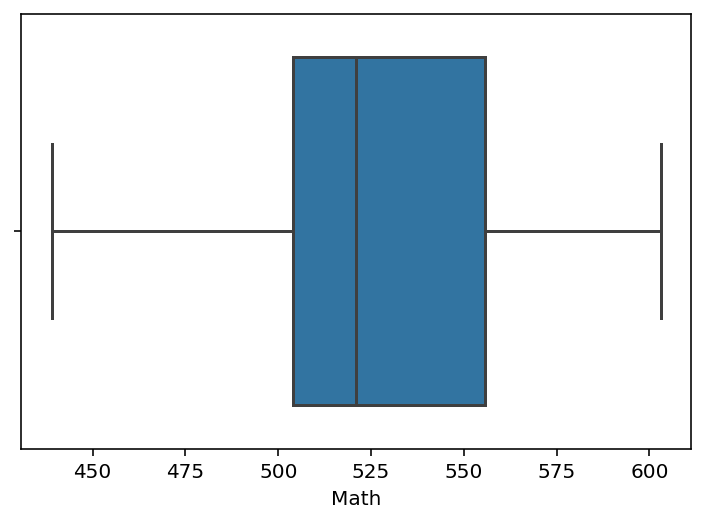

In [698]:
# no outliers in Math either
sb.boxplot(x=sat['Math'])

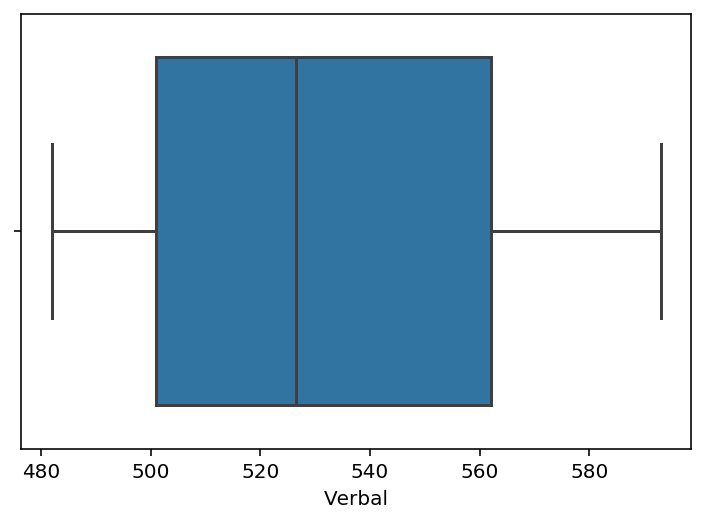

In [699]:
# and no outliers in Verbal
sb.boxplot(x=sat['Verbal'])

In [700]:
# Outliers are "unlikely data"
# method 1 is finding points that are more than 1.5*IQR from Q1 or Q3 respectively
# this is one definition of outlier
# method 2 is based on the idea that it is unlikely to find more than 3 standard deviations from the mean value
# this is another definition of outlier


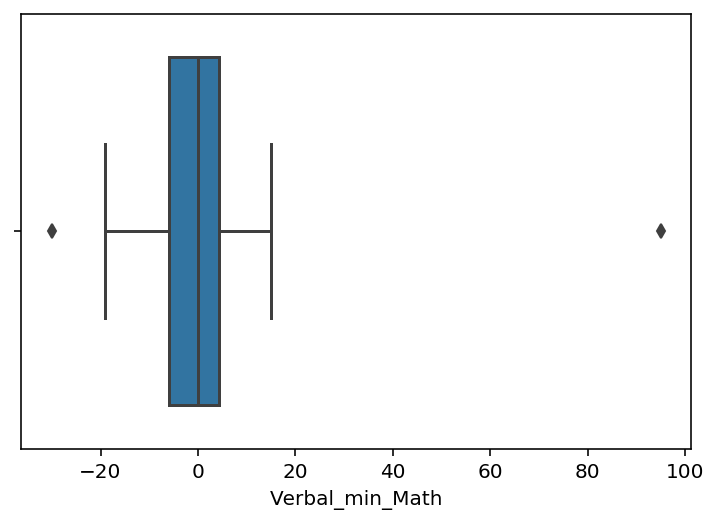

In [701]:
# There are two outliers total in the dataframe using method 1
# This method is finding points that are more than 1.5*IQR from Q1 or Q3 respectively
# These are the points outside of the whiskers
# The two outliers are in the Verbal_min_Math column
sb.boxplot(x=sat['Verbal_min_Math'])

In [702]:
# save out 25% and 75% quartile values as variables Q1 and Q3
Q1 = sat.describe().loc['25%',:]
Q3 = sat.describe().loc['75%',:]

#save values of interquartile range as IQR
IQR = Q3-Q1

# using method 1, get the rows in the dataframe which represent outliers, both come from the Verbal_min_Math colunm
# This can be seen by the box and whiskers plot or inspecting the mask inside the expression below
sat[((sat < (Q1 - 1.5 * IQR)) |(sat > (Q3 + 1.5 * IQR))).any(axis=1)]

State  Rate  Verbal   Math  Verbal_min_Math
21    HI  52.0   485.0  515.0            -30.0
27    OH  26.0   534.0  439.0             95.0

In [703]:
# find all Verval_min_Math vals that are more than 3 std from the mean, using method 2
mask_for_outlier = np.abs(stats.zscore(sat['Verbal_min_Math']))> 3

# look at outlier data, by applying mask to original dataframe
sat[mask_for_outlier]

State  Rate  Verbal   Math  Verbal_min_Math
27    OH  26.0   534.0  439.0             95.0

In [704]:
# remove outliers using method 2 definition of outliers

# look at numeric data, drop State
numeric_cols =['Rate','Verbal','Math','Verbal_min_Math']
sat_no_state = sat[numeric_cols]

# look at all outlying data, based on whether it is more than 3 std from the mean

# record to track the number of outliers
old_size = sat_no_state.shape[0]

# get a series where all the values are true only if the row does not contain any outliers
mask_for_outliers = (np.abs(stats.zscore(sat_no_state))< 3).all(axis=1)

# apply mask to sat, to remove outliers
cleaned_sat = sat[mask_for_outliers]


new_size = cleaned_sat.shape[0]
print('removed ',old_size - new_size, 'row(s) because of outliers')

# found one outlier using this method

removed  1 row(s) because of outliers


In [705]:
# create a for loop in order to find and print to compare, 
# mean, median and mode between old data and cleaned data,
#which has had outliers removed

for col in numeric_cols:
    old_mean = np.mean(sat[col])
    cleaned_mean = np.mean(cleaned_sat[col])
    print('Column:' + col)
    print('old mean: ',old_mean )
    print('clean mean: ', cleaned_mean )
    print('old - clean: ', old_mean-cleaned_mean)     
    
    # make it pretty, delineate sections
    print('*'*5)
    
    old_median = np.median(sat[col])
    cleaned_median = np.median(cleaned_sat[col])
    print('old median: ',old_median)
    print('clean median: ', cleaned_median )
    print('old - clean: ', old_median-cleaned_median)     
    
    # make it pretty, delineate sections
    print('*'*5)
    
    old_std = np.std(sat[col])
    cleaned_std = np.std(cleaned_sat[col])
    print('old std: ',old_std )
    print('clean std: ', cleaned_std )
    print('old - clean: ', old_std-cleaned_std)     

    # make it pretty, delineate sections
    print('-'*20)

Column:Rate
old mean:  37.15384615384615
clean mean:  37.372549019607845
old - clean:  -0.21870286576169207
*****
old median:  33.5
clean median:  34.0
old - clean:  -0.5
*****
old std:  27.03799649452359
clean std:  27.256199715188902
old - clean:  -0.2182032206653126
--------------------
Column:Verbal
old mean:  532.0192307692307
clean mean:  531.9803921568628
old - clean:  0.03883861236795383
*****
old median:  526.5
clean median:  526.0
old - clean:  0.5
*****
old std:  32.915094961603266
clean std:  33.2350454036619
old - clean:  -0.31995044205863366
--------------------
Column:Math
old mean:  531.5
clean mean:  533.3137254901961
old - clean:  -1.8137254901961342
*****
old median:  521.0
clean median:  525.0
old - clean:  -4.0
*****
old std:  35.66699616430595
clean std:  33.556209907789416
old - clean:  2.1107862565165334
--------------------
Column:Verbal_min_Math
old mean:  0.5192307692307693
clean mean:  -1.3333333333333333
old - clean:  1.8525641025641026
*****
old median:  0

In [706]:
# the most significant changes are found in regard to the Verbal_min_Math column
# especially the reduction of standard deviation size in the cleaned data as compared to the old data
# eliminating outliers should have the effect of redcuing standard deviation size
# it also lowers the mean
# while the median remains the same becuase of a significant portion of 0 median values in the old dataframe

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [707]:
stats.spearmanr(sat['Verbal'],sat['Math'])

SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

In [708]:
sat[['Verbal','Math']].corr().loc["Math","Verbal"]


0.899870852544429

In [709]:
# the spearman rank correlation finds a higher correlation by using ranks instead of the real values used in the pearson correlation
# the spearmn rank correlation is calculated by ranking the values in each column,
# then finding the differences (d) between the corresponding ranks
# then squaring those differences (d squared)
# count the total number of ranks (n)
# then (sum all of the d squared values), multiply them by 6 /then divide by
# n times (n squared minus 1)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [710]:
# create a new column in the datframe of the percentiles of the rates from rate column
# calculate percentile of rate by performing percentile of score formula on each value in rate column
sat['Perc_Rate']=sat['Rate'].apply(lambda x: stats.percentileofscore(sat['Rate'],x,kind='rank'))

# show the CA row in dataframe 
sat[sat['State']=='CA']


State  Rate  Verbal   Math  Verbal_min_Math  Perc_Rate
23    CA  51.0   498.0  517.0            -19.0  56.730769

In [711]:
# Like the spearman rank correlation, percentile is a system of ranking data, used 
# in order to examine it using a different, relational approach
# percentile is derived by assigning values rankings according to their relative relationship with the other values
# not by their real values

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [712]:
# percentile scoring blends outliers into ranks, therby hiding the significance of their variance
# this would be useful if someone was trying to reduce the skew in their data

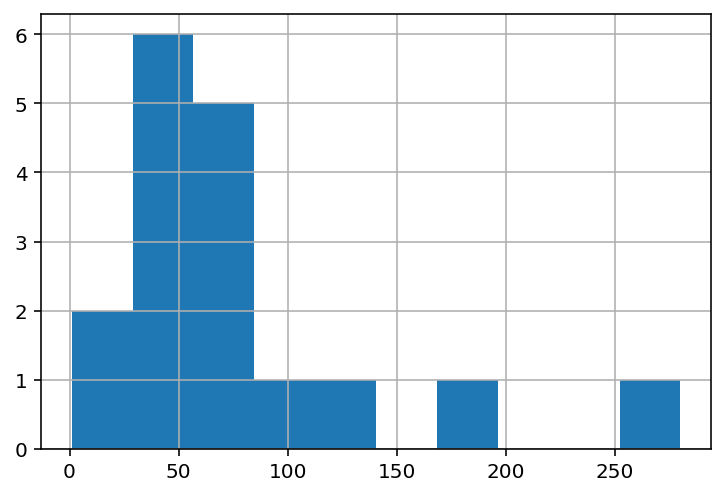

In [713]:
# plotted a histogram showing real value heroin frequency distribution
# this clearly shows where outliers are present

Drug['heroin-frequency'].hist()

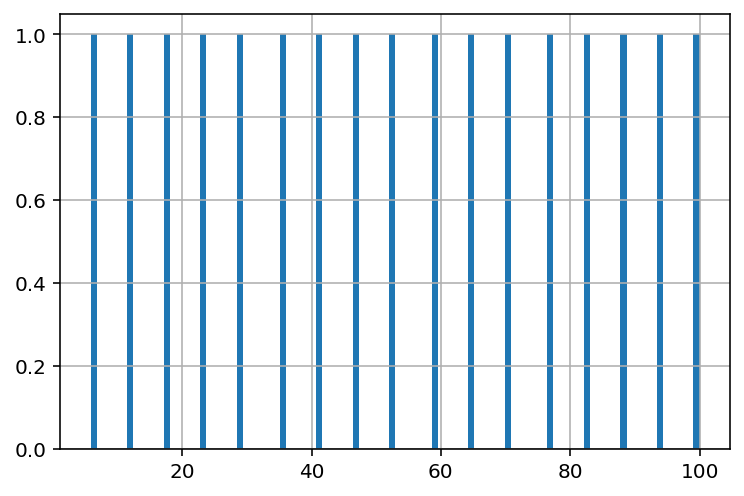

In [714]:
# plotted a histogram showing percentile representation of heroin frequency

Drug['heroin-frequency'].apply(lambda x: stats.percentileofscore(Drug['heroin-frequency'],x,kind='rank')).hist(bins=100)

In [715]:
# as is expected  when converting raw scores to percentiles
# the new histogram is flat, with equally spaced bins becuase each rank is of the same size, 
# with consistent spacing applied